# Set up connection to Data Base

## (1) Enter user name and password to connect to data base

In [1]:
import sys

sys.path.append("../")
from data_base.db_setup import *

Please enter DataJoint username:  tamara
Please enter DataJoint password:  ·········


Connecting tamara@localhost:3306


OperationalError: (2003, "Can't connect to MySQL server on 'localhost' ([Errno 111] Connection refused)")

## (2) Looking at individual tables

Get table 'patients':

In [2]:
Patient()

patient_id patient ID,age age of patient,gender gender of patient,year year of surgery,removed_tissue information about removed tissue,epilepsy_type information about epilepsy type,additional_information space for additional information
46,1,f,2015,unknown,unknown,
50,1,x,2016,unknown,unknown,
52,1,x,2016,unknown,unknown,
53,1,x,2016,unknown,unknown,
60,1,x,2017,unknown,unknown,


Get table 'movie_sessions':

In [3]:
MovieSession()

session_nr session ID,patient_id patient ID,date date of movie session,time,order_movie_frames order of movie frames for patient (watch log),cpu_time cpu time stamps (dts),neural_recording_time neural recording time (rectime),channel_names list of brain regions,additional_information space for additional information
1,46,2015-12-12,19:10:59,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,50,2016-05-02,19:55:31,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,52,2016-05-13,16:03:39,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,53,2016-06-01,18:34:58,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,60,2017-03-20,18:34:08,=BLOB=,=BLOB=,=BLOB=,=BLOB=,


In [6]:
PatientAlignedLabel()

annotator_id unique ID for each annotator,label_name label name,annotation_date date of annotation,session_nr session ID,patient_id patient ID,label_in_patient_time label matched to patient time (pts)
p1,interstitialscreens,2019-11-13,1,46,=BLOB=
p1,summer,2019-07-01,1,46,=BLOB=
p1,summer,2020-02-02,1,46,=BLOB=
p1,tom,2019-07-01,1,46,=BLOB=
p10,mckenzie,2019-07-23,1,46,=BLOB=
p10,mckenzie,2020-02-02,1,46,=BLOB=
p10,paul,2019-07-23,1,46,=BLOB=
p10,paul,2020-02-02,1,46,=BLOB=
p11,angry,2019-07-23,1,46,=BLOB=
p4,happy,2019-07-23,1,46,=BLOB=


## (3) Write queries using DataJoint to extract specific data from the data base

If you want to get the firing rates of patient 46, binned in seconds but only of the brain region 'LA', you can get it with the following query:

In [4]:
list_of_spikes_LA_46 = ((ElectrodeUnit & "brain_region = 'LA'" & "patient_id= '46'") * (BinnedSpikesDuringMovie & "bin_size='1000'")).fetch('spike_vector')[0]

In [6]:
list_of_spikes_LA_46 = np.load(list_of_spikes_LA_46)

In [7]:
list_of_spikes_LA_46

array([0, 0, 0, ..., 0, 0, 0])

Getting a label from the data base:

In [9]:
label_tom = (VideoAnnotation & "label_name='tom'").fetch("movie_label")[0]

In [11]:
label_tom = np.load(label_tom)

In [12]:
label_tom

array([0, 0, 0, ..., 0, 0, 0])

Some commonly used queries are implemented as python functions in 'db_setup.py'

In [17]:
get_unit_id(csc_nr = 10, unit_type='M', unit_nr=1, patient_id=46)

9

## (4) Visualising data base structure

green rectangles: manual tables
    
    
blue ellipses: imported tables
    

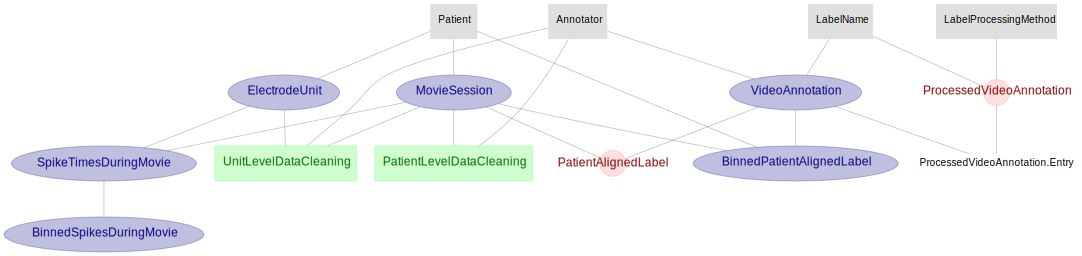

In [14]:
erd = dj.ERD(dhv_schema)
erd